In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(1021)

In [3]:
# 사이킷런 70:30

In [5]:
df = pd.read_csv('basketball_stat.csv')
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [6]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

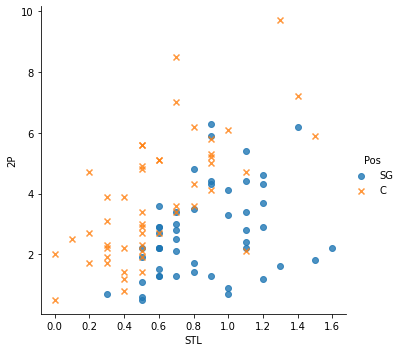

In [15]:
sns.lmplot('STL','2P',data=df,hue='Pos',markers=['o','x'], fit_reg=False)
# 선: 회귀선
# 선 주변 영역: 오차범위

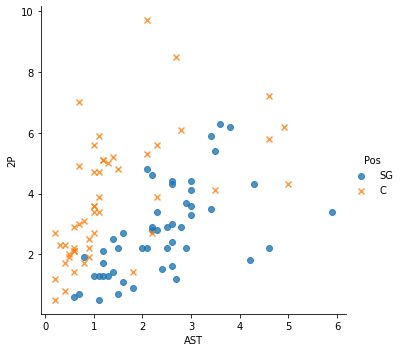

In [16]:
sns.lmplot('AST','2P',data=df,hue='Pos',markers=['o','x'], fit_reg=False)

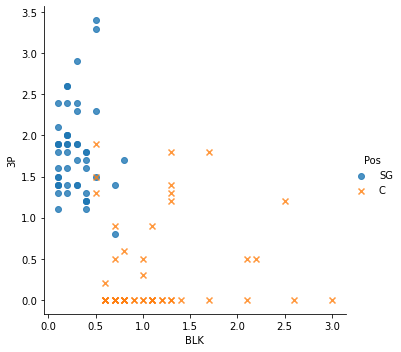

In [17]:
sns.lmplot('BLK','3P',data=df,hue='Pos',markers=['o','x'], fit_reg=False)

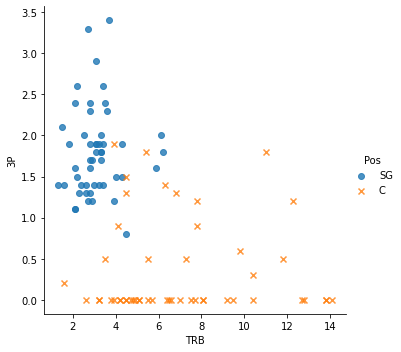

In [19]:
sns.lmplot('TRB','3P',data=df,hue='Pos',markers=['o','x'], fit_reg=False)

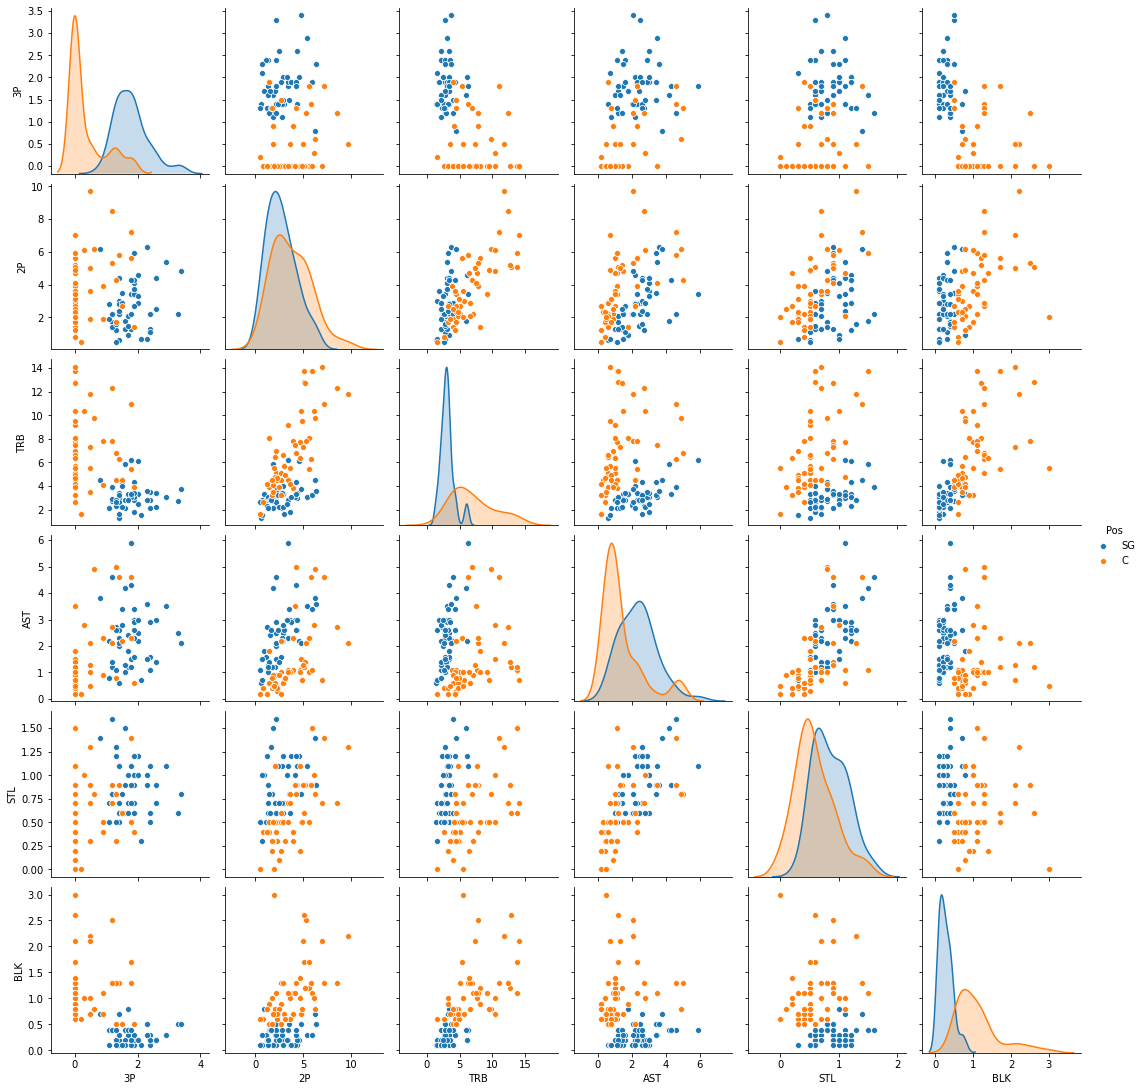

In [20]:
sns.pairplot(df,hue='Pos')

In [21]:
df.drop(['2P','AST','STL'], axis=1, inplace=True)

In [22]:
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


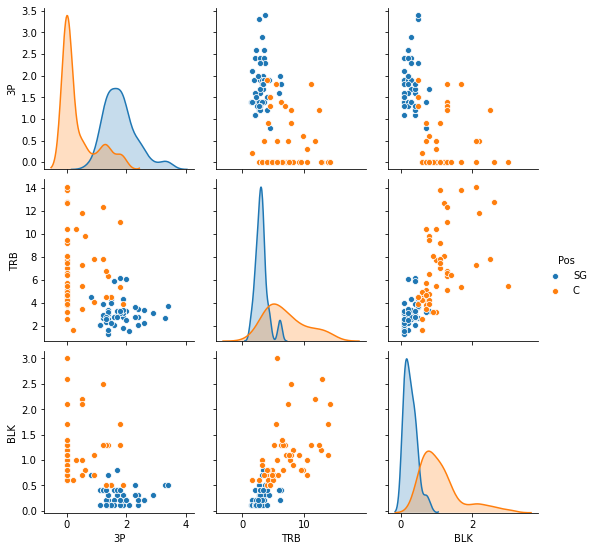

In [23]:
sns.pairplot(df,hue='Pos')

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
train, test = train_test_split(df, test_size=0.2)

In [27]:
train.shape

(80, 5)

In [28]:
train.to_csv("basketball_train.csv",index=None)
test.to_csv("basketball_test.csv",index=None)

In [ ]:
# kNN
# 최적의 k값
# k= 3 ~ 학습데이터의 절반 크기까지

In [30]:
maxKRange=train.shape[0]//2

In [33]:
kList=[]
for i in range(3,maxKRange,2): # 이진분류 → 동점 고려 짝수 제외
    kList.append(i)
kList

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [ ]:
# 교차검증 (cross-validation)
# train: 80건 / 10 fold = 8건씩 * 10개 폴드
# 1번째 폴드(Test) 
# 2~10 폴드(Train) → 모델 → 1번째 폴드로 검증 → 정확도 도출
# ...
# 10번째 폴드(Test), 1~9번째 폴드(Train) → 모델 → 검증 → 정확도 도출
# 전체 정확도의 평균: 최종성능 도출(k=3,5,7, ... , 39)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [35]:
xTrain=train[['3P','TRB','BLK']]
yTrain=train['Pos']

In [36]:
xTrain.shape

(80, 3)

In [44]:
yTrain.shape
yTrain.values

array(['SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'C', 'C', 'C', 'SG',
       'SG', 'C', 'SG', 'C', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'C',
       'C', 'C', 'C', 'SG', 'C', 'C', 'C', 'C', 'C', 'SG', 'C', 'C', 'SG',
       'C', 'SG', 'SG', 'C', 'C', 'C', 'C', 'C', 'C', 'SG', 'C', 'SG',
       'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'C',
       'SG', 'C', 'C', 'SG', 'C', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'SG',
       'SG', 'SG', 'SG', 'SG', 'C', 'C', 'C', 'C', 'SG'], dtype=object)

In [47]:
cross_val_scores=[]
for k in kList:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, xTrain, yTrain, cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())

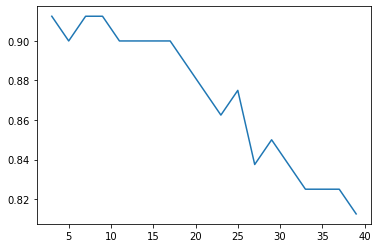

In [53]:
plt.plot(kList,cross_val_scores)

In [59]:
k = kList[cross_val_scores.index(max(cross_val_scores))]
print('최적의 k = '+str(k))

최적의 k = 3


In [61]:
#### 3점숫과 블로킹 데이터로 포지션 예측 ####
knn = KNeighborsClassifier(n_neighbors=k,n_jobs=4)

In [62]:
xTrain=train[['3P','BLK']]
yTrain=train['Pos']

In [64]:
knn.fit(xTrain, yTrain)

KNeighborsClassifier(n_jobs=4, n_neighbors=3)

In [65]:
xTest=test[['3P','BLK']]
yTest=test['Pos']

In [67]:
pred = knn.predict(xTest)

In [68]:
pd.DataFrame({"예측" : pred, '정답': yTest})

,예측,정답
37,SG,C
81,SG,SG
65,SG,SG
28,SG,SG
22,SG,SG
77,C,C
51,C,C
45,SG,SG
78,SG,SG
24,C,C


In [69]:
from sklearn.metrics import accuracy_score

In [73]:
print("정확도: "+str(accuracy_score(yTest, pred)*100))

정확도: 90.0


In [74]:
xTrain=train[['3P','TRB','BLK']]
yTrain=train['Pos']

In [75]:
xTest=test[['3P','TRB','BLK']]
yTest=test['Pos']

In [76]:
knn.fit(xTrain, yTrain)

KNeighborsClassifier(n_jobs=4, n_neighbors=3)

In [77]:
pred = knn.predict(xTest)

In [78]:
pd.DataFrame({"예측" : pred, '정답': yTest})

,예측,정답
37,SG,C
81,SG,SG
65,SG,SG
28,SG,SG
22,SG,SG
77,C,C
51,C,C
45,SG,SG
78,SG,SG
24,C,C


In [80]:
print("정확도: "+str(accuracy_score(yTest, pred)*100))

정확도: 90.0
